In [106]:
import numpy as np
import pandas as pd
import os
import kagglehub
from PIL import Image, ImageEnhance, ImageFilter, ImageStat
from skimage import filters
import concurrent.futures
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from ipywidgets import interact, widgets

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/new-plant-diseases-dataset


In [77]:
base_path = "../input/new-plant-diseases-dataset"
os.listdir(base_path)

# le dossier contient trois sous dossiers

['New Plant Diseases Dataset(Augmented)',
 'new plant diseases dataset(augmented)',
 'test']

In [78]:
base_path = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
os.listdir(base_path)

# on va tester si le dossier "" contient des images et si oui combien
# base_path_2 = "../input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"

['valid', 'train']


**La main root du jeu de données contient 2 dossiers : (New Plant Diseases Dataset (Augmented)) et (Test). <br> Dans le premier, nous pouvons voir les répertoires 'Train' et 'Valid', et dans le deuxième, nous avons nos images de Test**

In [79]:
test_path = "../input/new-plant-diseases-dataset/test/test"
subfolder_test = os.listdir(test_path)

# Combien d'images dans le dossier de test ?

len(subfolder_test)

33

**Le dossier de test contient 33 images.**

In [80]:
# Combien d'images dans le dossier d'entraînement ?

In [81]:
train_path = base_path + '/' + "train"
valid_path = base_path + '/' + "valid"

subfolder_train = os.listdir(train_path)
subfolder_valid = os.listdir(valid_path)

In [82]:
species_train = {}
for i in subfolder_train:
    path_to_specie = train_path+'/'+i
    species_train[i] = len(os.listdir(path_to_specie))

# on convertit list en dataframe pour que ce soit plus lisible
# et facilement manipulable
# on met les espèces de plantes en index et le nombre d'images en colonne

df_train = pd.DataFrame(species_train.values(), index=species_train.keys(), 
                              columns=["nombre d'images"])

sum_1 = df_train["nombre d'images"].sum()
print("Il y a",sum_1,"images dans le dossier d'entrainement")

Il y a 70295 images dans le dossier d'entrainement


**Il y a 70295 images dans le dossier d'entrainement**

In [83]:
# Combien d'images dans le dossier valid ?

In [84]:
species_valid = {}
for i in subfolder_valid:
    path_to_specie = valid_path+'/'+i
    species_valid[i] = len(os.listdir(path_to_specie))

df_valid = pd.DataFrame(species_valid.values(), index=species_valid.keys(), 
                              columns=["nombre d'images"])

sum_2 = df_valid["nombre d'images"].sum()
print("Il y a",sum_2,"images dans le dossier valid")
sum_total = sum_1 + sum_2
print("Il y a",sum_total,"images au total")

Il y a 17572 images dans le dossier valid
Il y a 87867 images au total


# test avec l'autre path
train_path_2 = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
subfolder_train_2 = os.listdir(train_path_2)
valid_path_2 = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
subfolder_valid_2 = os.listdir(valid_path_2)

species_train = {}
for i in subfolder_train_2:
    path_to_specie = train_path_2+'/'+i
    species_train[i] = len(os.listdir(path_to_specie))

# on convertit list en dataframe pour que ce soit plus lisible
# et facilement manipulable
# on met les espèces de plantes en index et le nombre d'images en colonne

df_train = pd.DataFrame(species_train.values(), index=species_train.keys(), 
                              columns=["nombre d'images"])

sum_1 = df_train["nombre d'images"].sum()
print("Il y a",sum,"images dans le dossier d'entrainement")

In [85]:
# Nous allons joindre nos deux datadrames dans un seul dataframes
# cela va nous permettre de comparer les données valides et d'entraînement

In [86]:
img_par_classe = pd.merge(df_valid, df_train, left_index=True, right_index=True)
display(img_par_classe)

,nombre d'images_x,nombre d'images_y
Tomato___Late_blight,463,1851
Tomato___healthy,481,1926
Grape___healthy,423,1692
Orange___Haunglongbing_(Citrus_greening),503,2010
Soybean___healthy,505,2022
Squash___Powdery_mildew,434,1736
Potato___healthy,456,1824
Corn_(maize)___Northern_Leaf_Blight,477,1908
Tomato___Early_blight,480,1920
Tomato___Septoria_leaf_spot,436,1745


**Il y a exactement le même nombre d'images d'entraînement et de validation par classe. <br> Nous allons regarder plus en détails les espèces présentes**

In [87]:
plants = []      # Liste des espèces uniques
maladies = []    # Liste des espèces malades
saines = []      # Liste des espèces saines

# Parcourir les sous-dossiers pour traiter chaque plant
for plant in subfolder_train:
    # Extraire l'espèce (avant '___') et vérifier si elle est déjà dans la liste
    espèce = plant.split('___')[0]
    
    if espèce not in plants:
        plants.append(espèce)  # Ajouter l'espèce à la liste des espèces uniques
    
    # Ajouter à la liste des saines ou des malades
    if plant.split('___')[1] == 'healthy':
        if espèce not in saines:  # Ajouter uniquement si l'espèce n'est pas déjà présente
            saines.append(espèce)
    else:
        if espèce not in maladies:  # Ajouter uniquement si l'espèce n'est pas déjà présente
            maladies.append(espèce)

# Affichage des résultats
print(f"Les espèces sont : \n{plants}")
print(f"Les espèces saines sont : \n{saines}")
print(f"Les espèces malades sont : \n{maladies}")

Les espèces sont : 
['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']
Les espèces saines sont : 
['Tomato', 'Grape', 'Soybean', 'Potato', 'Peach', 'Blueberry', 'Pepper,_bell', 'Strawberry', 'Apple', 'Cherry_(including_sour)', 'Raspberry', 'Corn_(maize)']
Les espèces malades sont : 
['Tomato', 'Orange', 'Squash', 'Corn_(maize)', 'Strawberry', 'Apple', 'Cherry_(including_sour)', 'Peach', 'Grape', 'Potato', 'Pepper,_bell']


In [88]:
# nombre de plantes uniques
print("Nombre de plantes saines : {}".format(len(saines)))
# nombre de maladies uniques
print("Nombre de plantes malades : {}".format(len(maladies)))

Nombre de plantes saines : 12
Nombre de plantes malades : 11


In [89]:
# Convertir les listes en ensembles pour une comparaison rapide
plants_set = set(plants)
maladies_set = set(maladies)
saines_set = set(saines)

# Espèces présentes dans plants mais pas dans maladies
plants_pas_dans_maladies = plants_set - maladies_set

# Espèces présentes dans maladies mais pas dans plants
maladies_pas_dans_plants = maladies_set - plants_set

# Espèces présentes dans plants mais pas dans saines
plants_pas_dans_saines = plants_set - saines_set

# Espèces présentes dans saines mais pas dans plants
saines_pas_dans_plants = saines_set - plants_set

# Affichage des résultats
print(f"Espèces présentes dans 'plants' mais pas dans 'maladies' : {plants_pas_dans_maladies}")
print(f"Espèces présentes dans 'maladies' mais pas dans 'plants' : {maladies_pas_dans_plants}")

print(f"Espèces présentes dans 'plants' mais pas dans 'saines' : {plants_pas_dans_saines}")
print(f"Espèces présentes dans 'saines' mais pas dans 'plants' : {saines_pas_dans_plants}")


Espèces présentes dans 'plants' mais pas dans 'maladies' : {'Raspberry', 'Blueberry', 'Soybean'}
Espèces présentes dans 'maladies' mais pas dans 'plants' : set()
Espèces présentes dans 'plants' mais pas dans 'saines' : {'Squash', 'Orange'}
Espèces présentes dans 'saines' mais pas dans 'plants' : set()


**Nous avons donc 14 espèces de plantes et 26 plantes malades**

**Il y a des espèces que nous pourront identifier mais pas les maladies car elles ne sont pas présentes dans les données ('Soybean', 'Raspberry', 'Blueberry') <br>Certaines espèces sont présentes seulement avec des feuilles malades mais n'ont pas de feuilles saines pour comparer ('Orange', Squash'). Ces espèces devront être exclues de l'analyse**

**Nous allons maintenant créer un dataframe qui contient toutes les métadonnées de nos images.**

In [90]:
for i in subfolder_train:
    path_to_specie = os.path.join(train_path, i)

print(path_to_specie)

../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy


In [91]:
# Fonction pour calculer la luminosité, le contraste et le flou
def calculate_image_stats(image):
    # Calculer la luminosité
    stat = ImageStat.Stat(image)
    luminosity = np.mean(stat.mean)  # Moyenne des valeurs des pixels
    
    # Calculer le contraste (écart-type des valeurs des pixels)
    contrast = np.std(stat.mean)  # Ecart-type des valeurs de chaque canal
    
    # Convertir en niveaux de gris pour appliquer le Laplacien
    gray_image = image.convert('L')
    gray_image_array = np.array(gray_image)
    
    # Appliquer l'opérateur de Laplacien avec OpenCV
    laplacian = cv2.Laplacian(gray_image_array, cv2.CV_64F)
    
    # Calculer la variance du Laplacien pour estimer le flou
    blurriness = laplacian.var()  # Variance du Laplacien
    
    return luminosity, contrast, blurriness

# Fonction pour récupérer les informations qualitatives du dossier
def extract_species_info(path_to_specie):
    # Extraire le nom du dossier
    folder_name = os.path.basename(path_to_specie)
    
    # Extraire le nom de l'espèce (avant le premier '___')
    species_name = folder_name.split('___')[0]
    
    # Extraire la catégorie (après le premier '___')
    category = folder_name.split('___')[1] if '___' in folder_name else None
    
    # Vérifier si la plante est "healthy" à la fin du nom du dossier
    healthy_status = 'healthy' in folder_name.lower()
    
    return species_name, category, healthy_status

# Fonction pour traiter une image et extraire les métadonnées
def process_image(img_file, path_to_specie):
    chemin_image = os.path.join(path_to_specie, img_file)
    
    try:
        # Ouvrir l'image
        img = Image.open(chemin_image)
        
        # Obtenir la taille du fichier (en octets)
        file_size = os.stat(chemin_image).st_size  # Taille du fichier en octets
        
        # Extraire les dimensions (largeur et hauteur)
        largeur, hauteur = img.size
        
        # Calculer la luminosité, le contraste et le flou
        luminosity, contrast, blurriness = calculate_image_stats(img)
        
        # Extraire les informations qualitatives du dossier
        species_name, category, healthy_status = extract_species_info(path_to_specie)
        
        # Retourner les métadonnées sous forme de dictionnaire
        return {
            'Chemin': chemin_image,
            'Taille du fichier (octets)': file_size,
            'Largeur': largeur,
            'Hauteur': hauteur,
            'Contraste': contrast,
            'Luminosité': luminosity,
            'Flou': blurriness,
            'Nom de l\'espèce': species_name,
            'Catégorie': category,
            'Plante en bonne santé': healthy_status
        }
    except Exception as e:
        print(f"Erreur lors de l'ouverture de l'image {img_file}: {e}")
        return None

# Liste pour stocker toutes les images et leurs métadonnées
all_image_data = []

# Parcourir tous les sous-dossiers (espèces)
for subfolder in subfolder_train:
    path_to_specie = os.path.join(train_path, subfolder)
    
    # Vérifier si c'est un dossier et non un fichier
    if os.path.isdir(path_to_specie):
        # Lister tous les fichiers dans le sous-dossier
        images = [f for f in os.listdir(path_to_specie) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Traiter chaque image et extraire les métadonnées
        for img_file in images:
            result = process_image(img_file, path_to_specie)
            if result is not None:
                all_image_data.append(result)

# Créer un DataFrame à partir des données collectées
df_plantes = pd.DataFrame(all_image_data)

# Afficher les informations du DataFrame
df_plantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Chemin                      70295 non-null  object 
 1   Taille du fichier (octets)  70295 non-null  int64  
 2   Largeur                     70295 non-null  int64  
 3   Hauteur                     70295 non-null  int64  
 4   Contraste                   70295 non-null  float64
 5   Luminosité                  70295 non-null  float64
 6   Flou                        70295 non-null  float64
 7   Nom de l'espèce             70295 non-null  object 
 8   Catégorie                   70295 non-null  object 
 9   Plante en bonne santé       70295 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 4.9+ MB


In [92]:
df_plantes.head()

,Chemin,Taille du fichier (octets),Largeur,Hauteur,Contraste,Luminosité,Flou,Nom de l'espèce,Catégorie,Plante en bonne santé
0,../input/new-plant-diseases-dataset/New Plant ...,19106,256,256,3.288891,119.422297,6661.394059,Tomato,Late_blight,False
1,../input/new-plant-diseases-dataset/New Plant ...,15243,256,256,7.725343,153.572678,3247.849273,Tomato,Late_blight,False
2,../input/new-plant-diseases-dataset/New Plant ...,9006,256,256,2.882286,113.930618,381.368452,Tomato,Late_blight,False
3,../input/new-plant-diseases-dataset/New Plant ...,11903,256,256,1.261357,122.495300,824.095736,Tomato,Late_blight,False
4,../input/new-plant-diseases-dataset/New Plant ...,12951,256,256,6.299817,110.564830,1407.233310,Tomato,Late_blight,False


In [93]:
df_plantes.describe()

,Taille du fichier (octets),Largeur,Hauteur,Contraste,Luminosité,Flou
count,70295.000000,70295.0,70295.0,70295.000000,70295.000000,70295.000000
mean,16237.497119,256.0,256.0,9.210277,119.182353,4337.678321
std,4118.221195,0.0,0.0,5.228858,25.317521,3551.906028
min,2693.000000,256.0,256.0,0.008385,7.649760,4.659030
25%,13139.000000,256.0,256.0,5.281811,105.494898,1399.860213
50%,16627.000000,256.0,256.0,8.327466,116.566142,3802.812080
75%,19350.000000,256.0,256.0,11.998841,127.684565,6342.160738
max,30721.000000,256.0,256.0,40.204330,252.436701,32269.415001


**Maintenant, nous allons vérifier les extensions de nos fichiers et le nombre de fichiers par extension**

In [94]:
# Fonction pour récupérer toutes les extensions d'images d'un sous-dossier et compter chaque type d'extension
def get_image_extensions_and_count(path_to_specie):
    extension_count = {}  # Dictionnaire pour compter les occurrences des extensions
    
    # Parcourir tous les fichiers du sous-dossier
    for file_name in os.listdir(path_to_specie):
        # Obtenir l'extension du fichier
        name, ext = os.path.splitext(file_name)
        
        # Vérifier si l'extension est une extension d'image
        if ext.lower() in ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'):
            ext = ext.lower()  # Mettre l'extension en minuscule pour éviter les doublons
            if ext in extension_count:
                extension_count[ext] += 1  # Incrémenter le compteur pour cette extension
            else:
                extension_count[ext] = 1  # Initialiser le compteur pour cette extension
                
    return extension_count

# Dictionnaire global pour compter les extensions sur tous les sous-dossiers
global_extension_count = {}

# Boucle pour parcourir les sous-dossiers
for i in subfolder_train:
    path_to_specie = os.path.join(train_path, i)  # Chemin complet du sous-dossier
    
    # Vérifier si c'est un dossier avant d'exécuter la fonction
    if os.path.isdir(path_to_specie):
        # Récupérer les extensions d'images et compter chaque type d'extension dans ce sous-dossier
        extension_count = get_image_extensions_and_count(path_to_specie)
        
        # Ajouter les résultats au dictionnaire global
        for ext, count in extension_count.items():
            if ext in global_extension_count:
                global_extension_count[ext] += count  # Ajouter au total global
            else:
                global_extension_count[ext] = count  # Initialiser le total global pour cette extension
                
    else:
        print(f"Le chemin {path_to_specie} n'est pas un dossier.")

# Affichage des résultats finaux
print("\nTotal des fichiers par extension :")
for ext, count in global_extension_count.items():
    print(f"{ext}: {count}")


Total des fichiers par extension :
.jpg: 70295


# Préparation des données pour la dataviz

In [95]:
# Transformation de la colonne "Plante en bonne santé" au format int

df_plantes["Plante en bonne santé"] = df_plantes["Plante en bonne santé"].astype(int)

df_plantes.head()

,Chemin,Taille du fichier (octets),Largeur,Hauteur,Contraste,Luminosité,Flou,Nom de l'espèce,Catégorie,Plante en bonne santé
0,../input/new-plant-diseases-dataset/New Plant ...,19106,256,256,3.288891,119.422297,6661.394059,Tomato,Late_blight,0
1,../input/new-plant-diseases-dataset/New Plant ...,15243,256,256,7.725343,153.572678,3247.849273,Tomato,Late_blight,0
2,../input/new-plant-diseases-dataset/New Plant ...,9006,256,256,2.882286,113.930618,381.368452,Tomato,Late_blight,0
3,../input/new-plant-diseases-dataset/New Plant ...,11903,256,256,1.261357,122.495300,824.095736,Tomato,Late_blight,0
4,../input/new-plant-diseases-dataset/New Plant ...,12951,256,256,6.299817,110.564830,1407.233310,Tomato,Late_blight,0


In [96]:
# regrouper dans un nouveau dataframe les données par espèce / catégorie
# et si elles sont en bonne santé

# Définition des fonctions d'agrégation
fonctions = {
    'Nom de l\'espèce': 'count',          
    'Catégorie': 'count',                 
    'Plante en bonne santé': 'sum' 
}

df_plantes_agg = df_plantes.groupby(['Nom de l\'espèce', 'Catégorie', 'Plante en bonne santé']).agg(fonctions)

df_plantes_agg = df_plantes_agg.rename_axis(['Nom de l\'espèce', 'Catégorie', 'Plante en bonne santé'])

# vérifier les colonnes existantes et les renommer si nécessaire pour éviter les conflits de noms
df_plantes_agg.columns = [col if col not in ['Nom de l\'espèce', 'Catégorie', 'Plante en bonne santé'] else f'{col}_agg' for col in df_plantes_agg.columns]

# Réinitialiser l'index tout en gardant les colonnes d'index
df_plantes_agg = df_plantes_agg.reset_index()

df_plantes_agg['count_img'] = df_plantes_agg['Nom de l\'espèce_agg'] + df_plantes_agg['Plante en bonne santé_agg']

df_plantes_agg = df_plantes_agg.drop(columns=['Nom de l\'espèce_agg','Catégorie_agg','Plante en bonne santé_agg', 'Plante en bonne santé'])
df_plantes_agg.head()

,Nom de l'espèce,Catégorie,count_img
0,Apple,Apple_scab,2016
1,Apple,Black_rot,1987
2,Apple,Cedar_apple_rust,1760
3,Apple,healthy,4016
4,Blueberry,healthy,3632


In [ ]:
G = nx.Graph()

# Ajouter les nœuds (espèces et catégories)
noms_especes = df_plantes_agg['Nom de l\'espèce']
categories = df_plantes_agg['Catégorie']
G.add_nodes_from(noms_especes)  # Nœuds pour les espèces
G.add_nodes_from(categories)  # Nœuds pour les catégories

# Ajouter les arêtes entre espèces et catégories avec poids 'count_img'
for i in range(len(df_plantes_agg)):
    plante = df_plantes_agg['Nom de l\'espèce'][i]
    categorie = df_plantes_agg['Catégorie'][i]
    count_img = df_plantes_agg['count_img'][i]
    
    # Relier chaque espèce à sa catégorie en pondérant l'arête avec 'count_img'
    G.add_edge(plante, categorie, weight=count_img)

# Choisir un meilleur layout pour espacer les nœuds
pos = nx.spring_layout(G, seed=42, k=2)  # Augmenter 'k' pour plus d'espace entre nœuds

# Affichage du graphe avec des positions espacées
plt.figure(figsize=(16, 16))  # Taille du graphique plus grande pour plus d'espace
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=5000, font_size=12, font_weight='bold', edge_color='gray')

# Ajouter les poids (count_img) sur les arêtes
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Réseau des espèces et catégories avec pondération 'count_img'")
plt.show()

In [107]:
# Fonction pour filtrer et afficher le graphe par espèce
def afficher_graphe_par_espece(espece_selectionnee):
    # Filtrer les données pour l'espèce sélectionnée
    df_filtre = df_plantes_agg[df_plantes_agg['Nom de l\'espèce'] == espece_selectionnee]
    
    # Créer le graphe
    G = nx.Graph()

    # Ajouter les nœuds (espèces et catégories) pour l'espèce filtrée
    noms_especes = df_filtre['Nom de l\'espèce']
    categories = df_filtre['Catégorie']
    G.add_nodes_from(noms_especes)  # Nœuds pour les espèces
    G.add_nodes_from(categories)  # Nœuds pour les catégories

    # Ajouter les arêtes entre espèces et catégories avec poids 'count_img'
    for i in range(len(df_filtre)):
        plante = df_filtre['Nom de l\'espèce'].iloc[i]  # Utilisation de iloc
        categorie = df_filtre['Catégorie'].iloc[i]  # Utilisation de iloc
        count_img = df_filtre['count_img'].iloc[i]  # Utilisation de iloc
        
        # Relier chaque espèce à sa catégorie en pondérant l'arête avec 'count_img'
        G.add_edge(plante, categorie, weight=count_img)
    
    # Choisir un layout pour bien espacer les nœuds
    pos = nx.spring_layout(G, seed=22, k=0.2)

    # Affichage du graphe avec des positions espacées
    plt.figure(figsize=(6, 6))  # Taille du graphique plus grande pour plus d'espace
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold', edge_color='gray')

    # Ajouter les poids (count_img) sur les arêtes
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f"Répartition des images par catégorie (maladie ou saine) pour '{espece_selectionnee}'")
    plt.show()

# Créer un widget de filtre (menu déroulant)
especes = df_plantes_agg['Nom de l\'espèce'].unique()  # Extraire les espèces uniques

# Utiliser 'interact' pour lier le dropdown avec la fonction d'affichage du graphe
interact(afficher_graphe_par_espece, espece_selectionnee=widgets.Dropdown(options=especes, description='Espèce:'))

interactive(children=(Dropdown(description='Espèce:', options=('Apple', 'Blueberry', 'Cherry_(including_sour)'…

<function __main__.afficher_graphe_par_espece(espece_selectionnee)>

**Nous avons une compréhension de notre donnée d'entraînement. Maintenant, vérifions que nos données d'entraînement et de validation contiennent les mêmes informations. Création d'un dataframe avec les données de validation**

In [99]:
# Fonction pour calculer la luminosité, le contraste et le flou
def calculate_image_stats(image):
    # Calculer la luminosité
    stat = ImageStat.Stat(image)
    luminosity = np.mean(stat.mean)  # Moyenne des valeurs des pixels
    
    # Calculer le contraste (écart-type des valeurs des pixels)
    contrast = np.std(stat.mean)  # Ecart-type des valeurs de chaque canal
    
    # Convertir en niveaux de gris pour appliquer le Laplacien
    gray_image = image.convert('L')
    gray_image_array = np.array(gray_image)
    
    # Appliquer l'opérateur de Laplacien avec OpenCV
    laplacian = cv2.Laplacian(gray_image_array, cv2.CV_64F)
    
    # Calculer la variance du Laplacien pour estimer le flou
    blurriness = laplacian.var()  # Variance du Laplacien
    
    return luminosity, contrast, blurriness

# Fonction pour récupérer les informations qualitatives du dossier
def extract_species_info(path_to_specie):
    # Extraire le nom du dossier
    folder_name = os.path.basename(path_to_specie)
    
    # Extraire le nom de l'espèce (avant le premier '___')
    species_name = folder_name.split('___')[0]
    
    # Extraire la catégorie (après le premier '___')
    category = folder_name.split('___')[1] if '___' in folder_name else None
    
    # Vérifier si la plante est "healthy" à la fin du nom du dossier
    healthy_status = 'healthy' in folder_name.lower()
    
    return species_name, category, healthy_status

# Fonction pour traiter une image et extraire les métadonnées
def process_image(img_file, path_to_specie):
    chemin_image = os.path.join(path_to_specie, img_file)
    
    try:
        # Ouvrir l'image
        img = Image.open(chemin_image)
        
        # Obtenir la taille du fichier (en octets)
        file_size = os.stat(chemin_image).st_size  # Taille du fichier en octets
        
        # Extraire les dimensions (largeur et hauteur)
        largeur, hauteur = img.size
        
        # Calculer la luminosité, le contraste et le flou
        luminosity, contrast, blurriness = calculate_image_stats(img)
        
        # Extraire les informations qualitatives du dossier
        species_name, category, healthy_status = extract_species_info(path_to_specie)
        
        # Retourner les métadonnées sous forme de dictionnaire
        return {
            'Chemin': chemin_image,
            'Taille du fichier (octets)': file_size,
            'Largeur': largeur,
            'Hauteur': hauteur,
            'Contraste': contrast,
            'Luminosité': luminosity,
            'Flou': blurriness,
            'Nom de l\'espèce': species_name,
            'Catégorie': category,
            'Plante en bonne santé': healthy_status
        }
    except Exception as e:
        print(f"Erreur lors de l'ouverture de l'image {img_file}: {e}")
        return None

# Liste pour stocker toutes les images et leurs métadonnées
all_image_data = []

# Parcourir tous les sous-dossiers (espèces)
for subfolder in subfolder_valid:
    path_to_specie = os.path.join(valid_path, subfolder)
    
    # Vérifier si c'est un dossier et non un fichier
    if os.path.isdir(path_to_specie):
        # Lister tous les fichiers dans le sous-dossier
        images = [f for f in os.listdir(path_to_specie) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Traiter chaque image et extraire les métadonnées
        for img_file in images:
            result = process_image(img_file, path_to_specie)
            if result is not None:
                all_image_data.append(result)

# Créer un DataFrame à partir des données collectées
df_plantes_valid = pd.DataFrame(all_image_data)

# Afficher les informations du DataFrame
df_plantes_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17572 entries, 0 to 17571
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Chemin                      17572 non-null  object 
 1   Taille du fichier (octets)  17572 non-null  int64  
 2   Largeur                     17572 non-null  int64  
 3   Hauteur                     17572 non-null  int64  
 4   Contraste                   17572 non-null  float64
 5   Luminosité                  17572 non-null  float64
 6   Flou                        17572 non-null  float64
 7   Nom de l'espèce             17572 non-null  object 
 8   Catégorie                   17572 non-null  object 
 9   Plante en bonne santé       17572 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [100]:
# Ajout d'une colonne contenant le type de donnée, pour que les deux datasets puissent être distingués dans le df concat
df_plantes_valid['data_type'] = 'validation'

In [101]:
# on renomme df_plantes pour une meilleure lisibilité
df_plantes_train = df_plantes

# on ajoute la colonne avec le type de donnée
df_plantes_train['data_type'] = 'train'

In [102]:
# concaténation des deux dataframe (entrainement et validation)

df_plantes_concat = pd.concat([df_plantes_train, df_plantes_valid], axis=0, ignore_index=True)

df_plantes_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87867 entries, 0 to 87866
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Chemin                      87867 non-null  object 
 1   Taille du fichier (octets)  87867 non-null  int64  
 2   Largeur                     87867 non-null  int64  
 3   Hauteur                     87867 non-null  int64  
 4   Contraste                   87867 non-null  float64
 5   Luminosité                  87867 non-null  float64
 6   Flou                        87867 non-null  float64
 7   Nom de l'espèce             87867 non-null  object 
 8   Catégorie                   87867 non-null  object 
 9   Plante en bonne santé       87867 non-null  int64  
 10  data_type                   87867 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 7.4+ MB


**Nous préparons les données pour la dataviz**

In [ ]:
df_plantes_concat["Plante en bonne santé"] = df_plantes_concat["Plante en bonne santé"].astype(int)

df_plantes_concat.head()

# regrouper dans un nouveau dataframe les données par espèce / catégorie
# et si elles sont en bonne santé

# Définition des fonctions d'agrégation
fonctions = {
    'Nom de l\'espèce': 'count',          
    'Catégorie': 'count',                 
    'Plante en bonne santé': 'sum' 
}

df_plantes_concat = df_plantes_concat.groupby(['Nom de l\'espèce', 'Catégorie', 'Plante en bonne santé', 'data_type']).agg(fonctions)

df_plantes_concat = df_plantes_concat.rename_axis(['Nom de l\'espèce', 'Catégorie', 'Plante en bonne santé','data_type'])

# vérifier les colonnes existantes et les renommer si nécessaire pour éviter les conflits de noms
df_plantes_concat.columns = [col if col not in ['Nom de l\'espèce', 'Catégorie', 'Plante en bonne santé','data_type'] else f'{col}_agg' for col in df_plantes_concat.columns]

# Réinitialiser l'index tout en gardant les colonnes d'index
df_plantes_concat = df_plantes_concat.reset_index()

df_plantes_concat['count_img'] = df_plantes_concat['Nom de l\'espèce_agg'] + df_plantes_concat['Plante en bonne santé_agg']

df_plantes_concat = df_plantes_concat.drop(columns=['Nom de l\'espèce_agg','Catégorie_agg','Plante en bonne santé_agg', 'Plante en bonne santé'])
df_plantes_concat.head()

,Nom de l'espèce,Catégorie,data_type,count_img
0,Apple,Apple_scab,train,2016
1,Apple,Apple_scab,validation,504
2,Apple,Black_rot,train,1987
3,Apple,Black_rot,validation,497
4,Apple,Cedar_apple_rust,train,1760


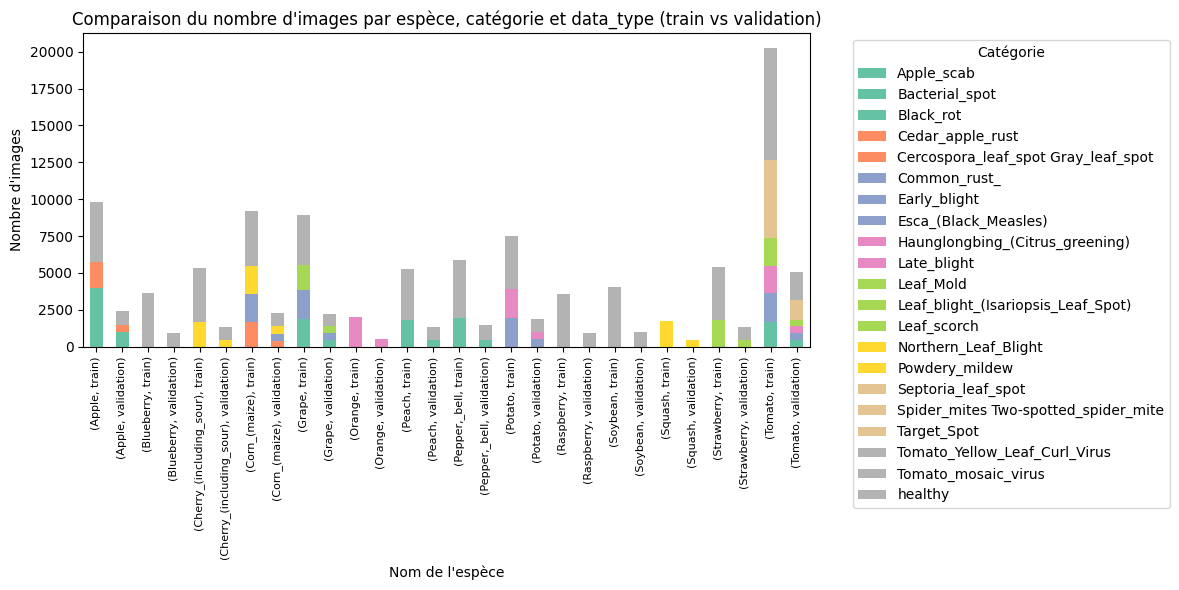

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On va d'abord préparer les données
df_pivot = df_plantes_concat.pivot_table(values='count_img', index=['Nom de l\'espèce', 'data_type'], columns='Catégorie', aggfunc='sum').reset_index()

# Créer un graphique à barres empilées, avec des barres séparées pour train et validation
fig, ax = plt.subplots(figsize=(12, 6))

# Empiler les données par catégories pour chaque espèce et data_type (train/validation)
df_pivot.set_index(['Nom de l\'espèce', 'data_type']).plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

# Personnalisation
plt.title("Comparaison du nombre d'images par espèce, catégorie et data_type (train vs validation)")
plt.xlabel("Nom de l'espèce")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=90, fontsize=8)
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuster la présentation
plt.tight_layout()

plt.show()